# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

a = [1, 1, 0, 2, 3, 3, 5, 2, 2, 1, 4, 4, 2, 3, 3,
               3, 2, 2, 1, 0, 4, 6, 2, 5, 6, 1, 4, 1, 4, 3,
               4, 2, 7, 6, 1, 2, 3, 6, 4, 2, 1, 4, 3, 3, 3,
               6, 8, 3, 5, 3, 3, 2, 1, 3, 5, 3, 5]

an = np.array(a)

Сумма генеральної сукупності

In [2]:
an.sum()

178

In [3]:
sum(a)

178

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[2, 9, 11, 15, 8, 5, 5, 1, 1]


In [44]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[0 1 2 3 4 5 6 7 8]
[ 2  9 11 15  0  8  5  5  1  1]


In [5]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[2, 9, 11, 15, 8, 5, 5, 1, 1]


In [6]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 2, 1: 9, 2: 11, 3: 15, 4: 8, 5: 5, 6: 5, 7: 1, 8: 1}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[2, 9, 11, 15, 8, 5, 5, 1, 1]


2) Обчислимо моду

In [7]:
from statistics import mode
mode(an)

3

In [8]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[3]


In [9]:
counts = np.bincount(an)
print(np.argmax(counts))

3


Медіана

In [10]:
from statistics import median
print(np.median(an))
print(median(an))

3.0
3


Варіаційний ряд відносних частот

In [11]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[2, 9, 11, 15, 8, 5, 5, 1, 1]
[0.035, 0.158, 0.193, 0.263, 0.14, 0.088, 0.088, 0.018, 0.018]


In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[2, 9, 11, 15, 8, 5, 5, 1, 1]
[ 0.03508772  0.15789474  0.19298246  0.26315789  0.14035088  0.0877193
  0.0877193   0.01754386  0.01754386]


Гістограма та полігон абсолютних частот

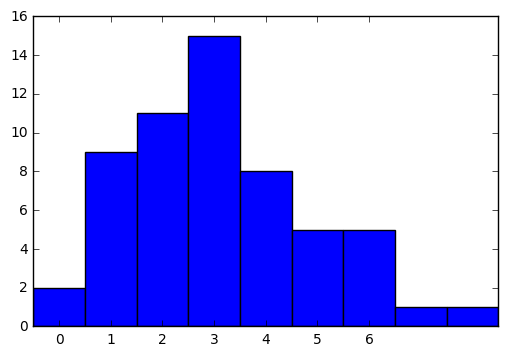

In [13]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(7) + width * 0.5, l_keys)
plt.show()

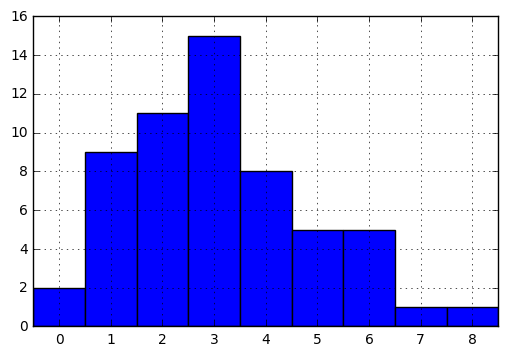

In [14]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

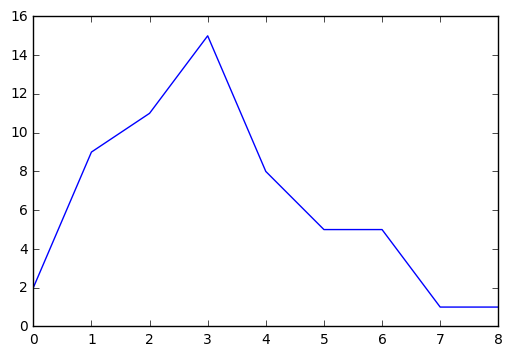

In [15]:
plt.plot(list(counter.keys()), values)
plt.show()

In [16]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

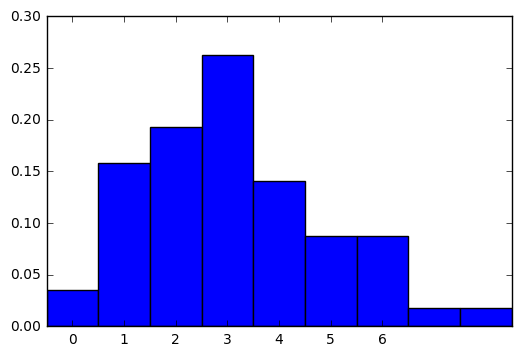

In [17]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(7) + width * 0.5, l_keys)
plt.show()

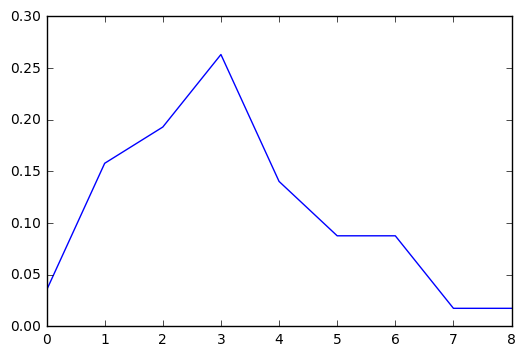

In [18]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [19]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [20]:
from statistics import mean
print(mean(a))
print(np.mean(an))

3.1228070175438596
3.12280701754


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [21]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

3.181077694235589
3.1810776942355883


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [22]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.3875038473376426

sqrt(Db)

In [23]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

1.7678431247242965
1.7678431247242963


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [51]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.56610706803


Накопичені частоти сортовані

In [47]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.03508771929824561, 0.15789473684210525, 0.19298245614035087, 0.2631578947368421, 0.14035087719298245, 0.08771929824561403, 0.08771929824561403, 0.017543859649122806, 0.017543859649122806]


Накопичені частоти

In [48]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.035,  0.193,  0.386,  0.649,  0.789,  0.877,  0.965,  0.982,  1.   ])

Складемо другу статистичну таблицю

In [50]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(9), 'Абсолютні частоти': list(counter.values()), 'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
print(x)

   Абсолютні частоти  Варіанта  Відносні частоти  Накопичені частоти
0                  2         0             0.035               0.035
1                  9         1             0.158               0.193
2                 11         2             0.193               0.386
3                 15         3             0.263               0.649
4                  8         4             0.140               0.789
5                  5         5             0.088               0.877
6                  5         6             0.088               0.965
7                  1         7             0.018               0.982
8                  1         8             0.018               1.000
